In [1]:
import sys
sys.path

['d:\\Desktop\\QBM_project_cleaned\\quMCMC\\final_results_notebooks',
 'd:\\anaconda_neel\\python38.zip',
 'd:\\anaconda_neel\\DLLs',
 'd:\\anaconda_neel\\lib',
 'd:\\anaconda_neel',
 '',
 'd:\\anaconda_neel\\lib\\site-packages',
 'd:\\anaconda_neel\\lib\\site-packages\\locket-0.2.1-py3.8.egg',
 'd:\\anaconda_neel\\lib\\site-packages\\win32',
 'd:\\anaconda_neel\\lib\\site-packages\\win32\\lib',
 'd:\\anaconda_neel\\lib\\site-packages\\Pythonwin',
 'd:\\anaconda_neel\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\NEELKANTH RAWAT\\.ipython']

In [2]:
sys.path.append("d:/Desktop/QBM_project_cleaned/quMCMC") 

In [3]:
import qumcmc

In [7]:
from qumcmc.classical_mcmc_routines import *

In [5]:
## import essential modules 
from qumcmc.basic_utils import *
from qumcmc.energy_models import IsingEnergyFunction, Exact_Sampling

from qumcmc.classical_mcmc_routines import classical_mcmc
from qumcmc.quantum_mcmc_routines import quantum_enhanced_mcmc # Manuel's code
from qumcmc.trajectory_processing import calculate_running_js_divergence, calculate_running_kl_divergence, calculate_runnning_magnetisation, get_trajectory_statistics
from qumcmc.prob_dist import DiscreteProbabilityDistribution

### Load the BAS dataset

In [6]:
gridsize=3

bas= bas_dataset(grid_size=gridsize)
bas.dataset.sort()

     MODEL : ising model BAS 9X9 bars + stripes |  beta : 1.5
Num Most Probable States : 12
Entropy : 3.5849625001146053
---------------------------------------------


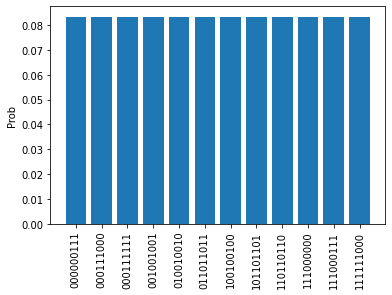

In [7]:
# consider only the bars dataset and create the weight matrix for them and create the ising model
wt= hebbing_learning(bas.bas_dict["bars"]+ bas.bas_dict["stripes"])## added 2 datapoints from stripes dataset into it
n_spins=gridsize*gridsize
shape_of_J=(n_spins,n_spins)
J=-1*wt
h=np.zeros(n_spins)
model=IsingEnergyFunction(J,h,name=f'ising model BAS {n_spins}X{n_spins} bars + stripes')

# model.model_summary()
beta=1.5
## run exact sampling over all possible configurations 
exact_sampled_model = Exact_Sampling(model, beta)

## get distribution from the model
bpd_2= DiscreteProbabilityDistribution(exact_sampled_model.boltzmann_pd)
exact_sampled_model.sampling_summary()


In [8]:
### let's check if the new code is even working as desired or not
from qumcmc.mixers import GenericMixer, CustomMixer, CoherentMixerSum, IncoherentMixerSum

### Now run 10 different chains for each case and save the data

In [11]:
num_chains=10
steps =10000 # 30000
gamma_range=(0.4,0.6)

initial_state="111000111"

In [12]:
import pickle

In [14]:
### Creating the mixers we need

generic_mixer = GenericMixer.OneBodyMixer(n_spins)
custom_mixer_stripes = CustomMixer(n_spins,[[0,3,6],[1,4,7],[2,5,8]])
custom_mixer_bars =  CustomMixer(n_spins,[[0, 1, 2], [3, 4, 5], [6, 7, 8]] )

coherent_mixer_only_bars = CoherentMixerSum([generic_mixer, custom_mixer_bars], 
                                            weights=[0.75, 0.25])
coherent_mixer_with_BAS_info = CoherentMixerSum([generic_mixer, custom_mixer_bars, custom_mixer_stripes],
                                                weights=[0.7,0.15,0.15])


incoherent_mixer_only_bars = IncoherentMixerSum([generic_mixer, custom_mixer_bars],
                                                probabilities=[0.75, 0.25])
incoherent_mixer_with_BAS_info = IncoherentMixerSum([generic_mixer, custom_mixer_bars, 
                                                    custom_mixer_stripes],
                                                probabilities=[0.7,0.15,0.15])

### Trying to standarise the problem for the case of mixture of mixers

In [21]:
import os
import pickle

# Get the current working directory (PWD)
pwd = os.getcwd()

# Define the new folder name
new_folder_name = "results_with_new_code"

# Create the full path for the new folder
results_folder_location = os.path.join(pwd, new_folder_name)

results_folder_location

'd:\\Desktop\\QBM_project_cleaned\\quMCMC\\final_results_notebooks\\results_with_new_code'

In [22]:
num_chains=1
steps =10 # 30000
gamma_range=(0.9,0.45)#[(0.9,0.95), (0.9,0.95), (0.4,0.6)]
initial_state="111000111"

In [28]:
bas_std=[]
for i in range(0, num_chains):  
    mcmc_std = quantum_enhanced_mcmc(
                                        n_hops=steps,
                                        model=model,
                                        mixer=coherent_mixer_only_bars,
                                        gamma = 0.5,#(0.9,0.45), # to standardise the problem
                                        initial_state=initial_state,
                                        temperature=1/beta, 
                                        verbose=True
                                    )
    bas_std.append(mcmc_std)

### save the list
# save_files_at = results_folder_location + "\\BAS_new_code_final_plots_wt1_75_bars_info_symm_25_gamma_std.pkl"
# with open(save_files_at, 'wb') as f:
#     pickle.dump(bas_std, f)

TypeError: Subscripted generics cannot be used with class and instance checks

In [ ]:
num_chains=10
steps =10000 # 30000
gamma_range=[(0.9,0.95), (0.4,0.6)]

initial_state="111000111"

my_mixer = [[['custom', [[0, 1, 2], [3, 4, 5], [6, 7, 8]]],### bars
                                            ['random', 1]] ### for random proposal
                                            ,
                                            [0.30,0.70]### proposal probabilities
                                            ]


bas_std_2=[]
for i in range(0, num_chains):  
    mcmc_std2 = quantum_enhanced_mcmc_2(n_hops=steps,
                                    model=model,
                                    initial_state=initial_state,
                                    mixer=my_mixer,
                                    gamma_range=gamma_range,
                                    verbose=True)
    bas_std_2.append(mcmc_std2)

### save the list
with open('BAS_final_plots_wt1_70_bars_symm_30_gamma_std.pkl', 'wb') as f:
    pickle.dump(bas_std_2, f)

In [ ]:
num_chains=10
steps =10000 # 30000
gamma_range=[(0.9,0.95), (0.4,0.6)]

initial_state="111000111"

my_mixer = [[['custom', [[0, 1, 2], [3, 4, 5], [6, 7, 8]]],### bars
                                            ['random', 1]] ### for random proposal
                                            ,
                                            [0.40,0.60]### proposal probabilities
                                            ]


bas_std_2=[]
for i in range(0, num_chains):  
    print(f"chain number: {i+1}")
    mcmc_std2 = quantum_enhanced_mcmc_2(n_hops=steps,
                                    model=model,
                                    initial_state=initial_state,
                                    mixer=my_mixer,
                                    gamma_range=gamma_range,
                                    verbose=True)
    bas_std_2.append(mcmc_std2)

### save the list
with open('BAS_final_plots_wt1_60_bars_symm_40_gamma_std.pkl', 'wb') as f:
    pickle.dump(bas_std_2, f)